In [9]:

import numpy as np
# from arsf_envi_reader import envi_header
import shutil
import os
import json
import math
# import affine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from osgeo import gdal,ogr,osr
from scipy.optimize import curve_fit
# from tqdm import tqdm
# import multiprocess as mp
# from numpy import trapz

In [10]:
high_res_img = gdal.Open(r'F:\wenqu\mosaic\simulation_mosaic\site2a\site2a_simulation_mosaic').ReadAsArray() 
# high_res_radiance = gdal.Open(r'D:\wenqu\site1b\uav\site1b_multi_or_radiance').ReadAsArray() 



NameError: name 'high_res_radiance' is not defined

In [11]:
high_res_img.shape

(122, 5218, 5519)

In [13]:
single_band = high_res_img[121,:,:]
single_band.shape

(5218, 5519)

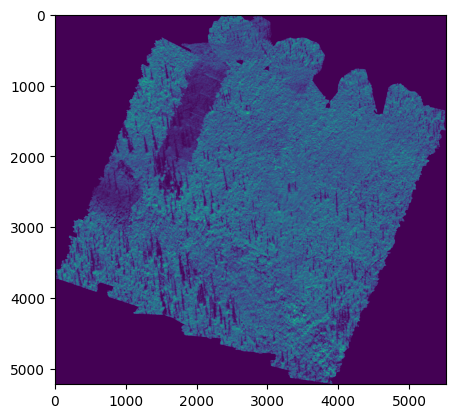

In [14]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(single_band)
plt.show()


In [15]:
single_band

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
single_band.min()

0.0

In [19]:
import rasterio

# Open the input raster file in read mode
with rasterio.open(r'F:\wenqu\mosaic\simulation_mosaic\site2a\site2a_simulation_mosaic') as src:

    # Get the raster data as a numpy array
    data = src.read(1)

    # Set the background value to NA
    data[src.nodata == True] = src.nodata

    # Write the output raster file with the same metadata as the input file
    with rasterio.open('F:/wenqu/Aviris/mask/output_raster.tif', 'w', **src.meta) as dst:
        dst.write(data, 1)


In [20]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
data = rasterio.open(r'F:\wenqu\mosaic\simulation_mosaic\site2a\site2a_simulation_mosaic').read(121)

In [26]:
data.shape

(5218, 5519)

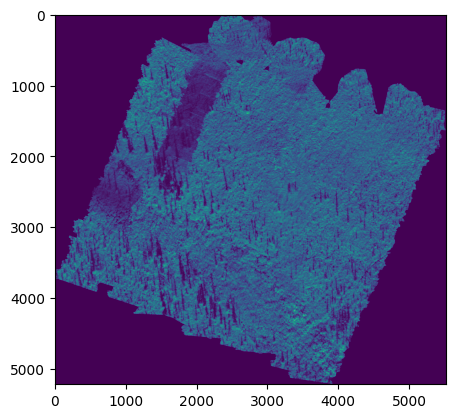

In [27]:
imgplot = plt.imshow(data)
plt.show()


In [28]:
data[src.nodata == True] = src.nodata

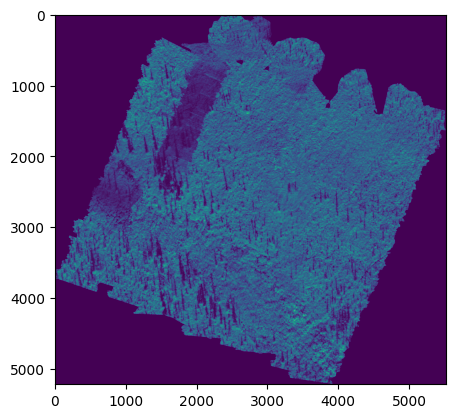

In [29]:
imgplot = plt.imshow(data)
plt.show()

In [37]:
# Reclassify the pixel values based on a threshold value
threshold = 0.0
data[data <= threshold] = 0  # Class 0
data[data > threshold] = 1 

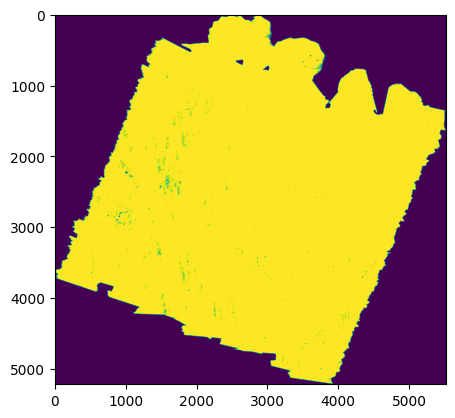

In [38]:
imgplot = plt.imshow(data)
plt.show()

In [ ]:
import scipy.signal as sg
im2 = sg.medfilt(data,kernel_size=39)

In [ ]:
imgplot = plt.imshow(im2)
plt.show()

In [31]:
inDs = gdal.Open(r'F:\wenqu\mosaic\simulation_mosaic\site2a\site2a_simulation_mosaic')

In [39]:
pj = inDs.GetProjection()  ## projection
gt = inDs.GetGeoTransform()  ## geotransform
col = inDs.GetRasterBand(1).XSize
row = inDs.GetRasterBand(1).YSize

In [40]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "mask2.tiff"
outPath ='F:/wenqu/Aviris/mask'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)

In [41]:
out_ds.GetRasterBand(1).WriteArray(data)

0

In [42]:
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds